### Se pide:

A partir del archivo "USA_Housing.csv", realizar la regresión lineal entre cada columna numérica con la columna 'price'. 

Cuando existe una columna(variable) que es la que se quiere comparar, se le llama 'target'. 

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
usa_housing = pd.read_csv("https://raw.githubusercontent.com/Gabvaztor/data_science_jun_2020/master/week8/day2/data/USA_Housing.csv")
usa_housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [8]:
usa_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [14]:
list_columnas = usa_housing._get_numeric_data().columns.tolist()[:-1]
# ._get_numeric_data() --> devuelve solos las columnas del dataframe que sean numéricas 
# .columns --> sacamos el nombre de las columnas, como un index
# .tolist() --> para poder iterar el index de las columnas, lo pasamos a lista
# [:-1] --> evitamos el último valor porque es "Price"
list_columnas

['Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Avg. Area Number of Bedrooms',
 'Area Population']

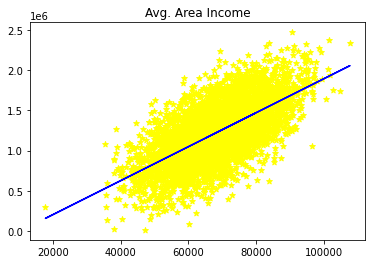

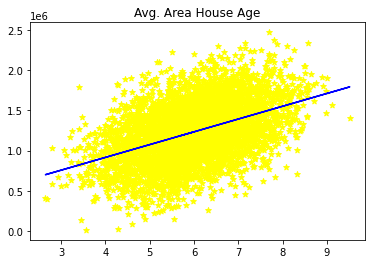

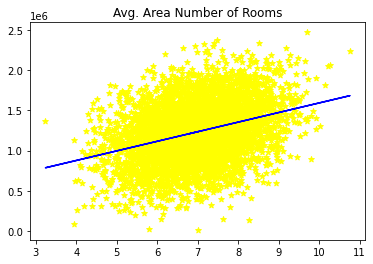

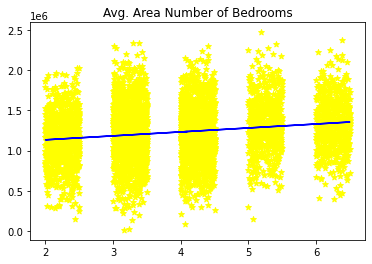

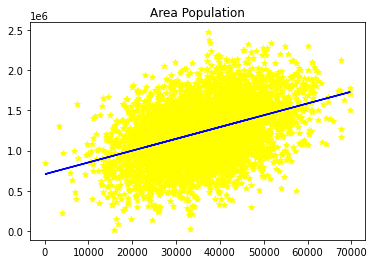

In [18]:
y = usa_housing['Price']

for columna in list_columnas:  
    
    X = usa_housing[[columna]]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

    model = LinearRegression()
    
    model.fit(X_train, y_train)
    
    plt.scatter(X, y, color='yellow', marker = "*")
    plt.plot(X, model.predict(X), color='blue')
    plt.title(columna)
    plt.show()